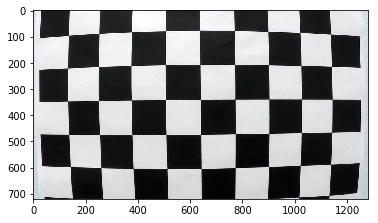

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import glob

#Read the callibration image
img = cv2.imread("images/calibration1.jpg")
plt.imshow(img)

In [5]:
# Load calibration images.
images = list(map(lambda imageFileName: (imageFileName, cv2.imread(imageFileName)), glob.glob('images/calibration*.jpg')))


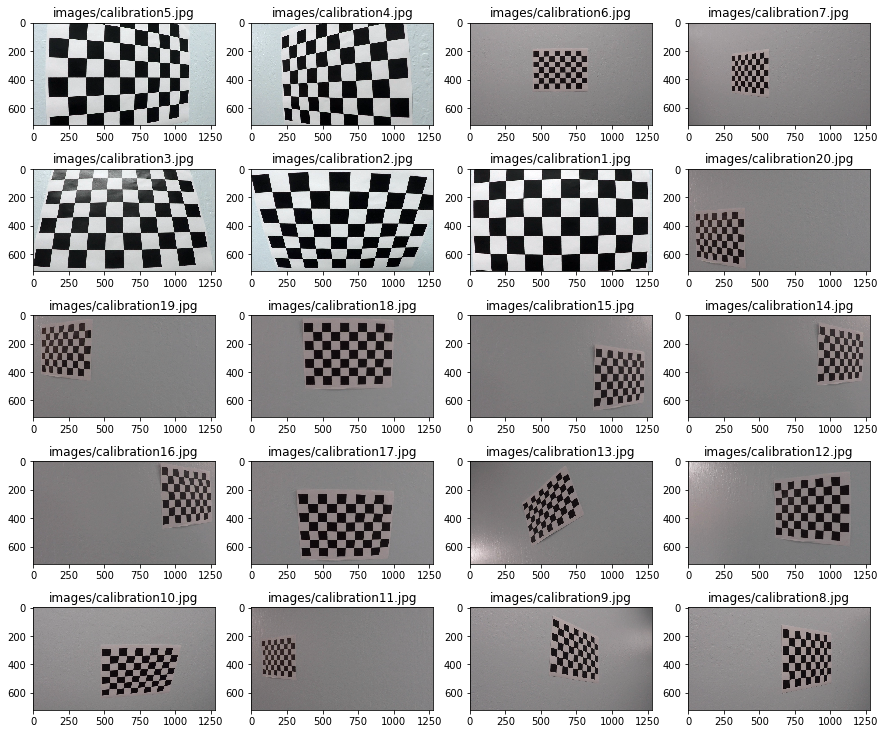

In [6]:
%matplotlib inline
def showImages(images, cols = 4, rows = 5, figsize=(15,10)):
    """
    Display `images` on a [`cols`, `rows`] subplot grid.
    """
    imgLength = len(images)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    indexes = range(cols * rows)
    for ax, index in zip(axes.flat, indexes):
        if index < imgLength:
            imagePathName, image = images[index]
            ax.imshow(image)
            ax.set_title(imagePathName)
        
showImages(images, 4, 5, (15, 13))

In [10]:

# Arrays to store object & image points from images
objpoints = []
imgpoints = []

# Prepare object points like (0,0,0), (1,0,0), (2,0,0), ... (6,4,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2) # x, y coordinates


# Read in each image
img = cv2.imread("images/calibration1.jpg")

# Convert image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (8,6),None)

# If corners are found, add object & image points
if ret == True:
    imgpoints.append(corners)
    objpoints.append(objp)
    #draw and display the corners 
    chess_img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
    plt.imshow(gray) 
    
# ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
# dst = cv2.undistort(img, mtx, dist, None, mtx)
# plt.imshow(dst)   